### 건물의 특정 특성을 기반으로 에너지 소비가 높은 건물과 낮은 건물로 클러스터링

In [4]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/국토안전관리원_공공건축물 에너지 소비량_20230331.csv',encoding='cp949')

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# '미제출' 값을 NaN으로 변환
data.replace('미제출', np.nan, inplace=True)

# 쉼표 제거 후 '연간 단위면적당 1차 에너지 소비량 3개년 평균' 열의 데이터 타입 변환
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str).str.replace(',', '').astype(float)

# 결측치 제거
data = data.dropna(subset=['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균'])

# 코드번호를 숫자로 변환 (범주형 변수로 처리)
data['코드번호'] = data['코드번호'].astype('category').cat.codes

# 쉼표 제거 후 '연면적'과 '냉난방면적' 열의 데이터 타입 변환
data['연면적'] = data['연면적'].astype(float)
data['냉난방면적'] = data['냉난방면적'].astype(float)

# 특성 변수 설정
X = data[['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균']]

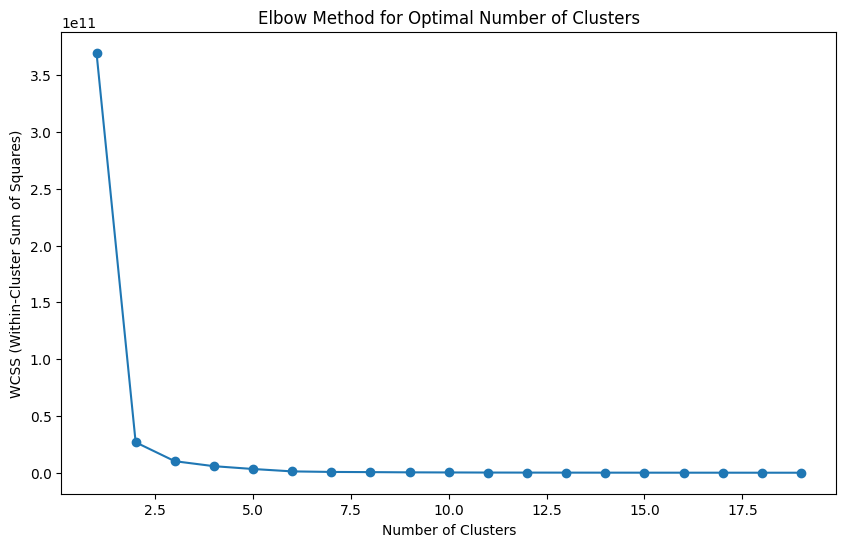

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 엘보우 기법을 사용하여 최적의 클러스터 개수 찾기
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 엘보우 기법 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

분산이 잘된 클러스터 기법을 선택

In [6]:
from sklearn.cluster import KMeans

# K-평균 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
data['클러스터'] = kmeans.fit_predict(X)

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())

# 각 클러스터의 중심 확인
print(kmeans.cluster_centers_)

클러스터
0    2030
4    1726
2       3
3       1
1       1
Name: count, dtype: int64
[[8.75371014e+02 9.97254589e+01]
 [2.87500000e+03 5.85684530e+05]
 [2.51433333e+03 3.97537367e+04]
 [1.84100000e+03 1.27834210e+05]
 [2.50876868e+03 8.46424318e+01]]


In [10]:
# Spectral Clustering with Optimal Clusters
spectral_clustering = SpectralClustering(n_clusters=5, random_state=42)
data['클러스터'] = spectral_clustering.fit_predict(X)

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())

c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


클러스터
0    3755
1       2
2       2
4       1
3       1
Name: count, dtype: int64


c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 200 with accuracies 
[4.91447156e-13 6.14653312e-05 7.57026187e-05 4.17251672e-05
 5.10898311e-05 5.26006100e-05]
not reaching the requested tolerance 5.6043267250061035e-05.
Use iteration 200 instead with accuracy 
4.709725979808513e-05.

  _, diffusion_map = lobpcg(
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[2.38383020e-13 6.14653406e-05 7.57026365e-05 4.17251473e-05
 5.10898190e-05 5.26006011e-05]
not reaching the requested tolerance 5.6043267250061035e-05.
  _, diffusion_map = lobpcg(


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 특성 변수 설정
X = data[['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균']]

# 계층적 클러스터링 수행
Z = linkage(X, method='ward')  # 'ward', 'single', 'complete', 'average' 등 다양한 방법이 있음

# 클러스터 할당 (최종 클러스터 개수 설정)
max_clusters = 3
data['클러스터'] = fcluster(Z, max_clusters, criterion='maxclust')

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())


클러스터
1    3757
2       3
3       1
Name: count, dtype: int64


In [17]:
from sklearn.cluster import DBSCAN

# 특성 변수 설정
X = data[['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균']]

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=3, min_samples=10)  # eps와 min_samples는 데이터에 따라 조정 필요
data['클러스터'] = dbscan.fit_predict(X)

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())


클러스터
-1    3761
Name: count, dtype: int64


In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth


# 특성 변수 설정
X = data[['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균']]

# 대역폭(반경) 추정
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# 평균 이동 클러스터링 수행
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X)
data['클러스터'] = mean_shift.labels_

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())

클러스터
0     2156
1     1574
2        5
15       3
3        2
4        2
14       1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
16       1
17       1
18       1
19       1
20       1
5        1
21       1
22       1
23       1
24       1
6        1
Name: count, dtype: int64


In [20]:
from sklearn.mixture import GaussianMixture

# 특성 변수 설정
X = data[['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균']]

# 가우시안 혼합 모델 클러스터링 수행
gmm = GaussianMixture(n_components=3, random_state=42)  # 클러스터 개수는 데이터에 맞게 조정
data['클러스터'] = gmm.fit_predict(X)

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())


클러스터
0    3757
2       3
1       1
Name: count, dtype: int64


In [23]:
pip install minisom

You should consider upgrading via the 'c:\Users\82106\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10681 sha256=8cd1b14401e0f60c08879d0de118170749e120132979a59b59556015f69389c0
  Stored in directory: c:\users\82106\appdata\local\pip\cache\wheels\b4\f6\8a\9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [44]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/국토안전관리원_공공건축물 에너지 소비량_20230331.csv',encoding='cp949')

# '미제출' 값을 NaN으로 변환
data.replace('미제출', np.nan, inplace=True)

# 쉼표 제거 후 '연간 단위면적당 1차 에너지 소비량 3개년 평균' 열의 데이터 타입 변환
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str).str.replace(',', '').astype(float)

# 이상치 제거
data = data[data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] < 100]

# 결과 확인
print(data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].describe())

count    3543.000000
mean       34.080144
std        19.415358
min         0.000000
25%        19.965000
50%        30.430000
75%        44.175000
max        99.180000
Name: 연간 단위면적당 1차 에너지 소비량 3개년 평균, dtype: float64


In [45]:
# 쉼표 제거 후 '전기 (KWH)', '가스 (KWH)', '유류 (KWH)' 열의 데이터 타입 변환
data['전기 (KWH)'] = data['전기 (KWH)'].astype(str).str.replace(',', '').astype(float)
data['가스 (KWH)'] = data['가스 (KWH)'].astype(str).str.replace(',', '').astype(float)
data['유류 (KWH)'] = data['유류 (KWH)'].astype(str).str.replace(',', '').astype(float)

# 에너지 총 소비량 칼럼 생성
data['에너지 총 소비량'] = data[['전기 (KWH)', '가스 (KWH)', '유류 (KWH)']].sum(axis=1)

# 결과 확인
print(data[['전기 (KWH)', '가스 (KWH)', '유류 (KWH)', '에너지 총 소비량']].head())

   전기 (KWH)  가스 (KWH)  유류 (KWH)  에너지 총 소비량
1  116510.0       0.0       0.0   116510.0
2   81733.0       0.0       0.0    81733.0
3   84973.0       0.0       0.0    84973.0
4  130200.0       0.0       0.0   130200.0
5   50471.0       0.0       0.0    50471.0


In [46]:
# 쉼표 제거 후 '연간 단위면적당 1차 에너지 소비량 3개년 평균' 열의 데이터 타입 변환
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str).str.replace(',', '').astype(float)

# 결측치 제거
data = data.dropna(subset=['코드번호', '연간 단위면적당 1차 에너지 소비량 3개년 평균'])

# 코드번호를 숫자로 변환 (범주형 변수로 처리)
data['에너지 총 소비량'] = data['에너지 총 소비량'].astype('category').cat.codes

# 쉼표 제거 후 '연면적'과 '냉난방면적' 열의 데이터 타입 변환
data['연면적'] = data['연면적'].astype(float)
data['냉난방면적'] = data['냉난방면적'].astype(float)


In [47]:
# 특성 변수 설정
X = data[['에너지 총 소비량', '연간 단위면적당 1차 에너지 소비량 3개년 평균']].values

# SOM 초기화 및 훈련
som_width, som_height = 5, 5  # SOM의 격자 크기 설정
som = MiniSom(x=som_width, y=som_height, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# 각 데이터 포인트의 승자 노드(Winner Node)를 찾기
winner_coordinates = np.array([som.winner(x) for x in X]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (som_width, som_height))

In [48]:
# 클러스터 결과를 데이터프레임에 추가
data['클러스터'] = cluster_index

# 클러스터링 결과 확인
print(data['클러스터'].value_counts())

클러스터
21    636
24    565
19    409
4     338
2     305
23    161
1     142
6     103
13     88
12     76
8      72
7      70
16     64
3      63
20     62
9      62
11     60
5      54
14     39
17     37
22     37
15     36
18     34
10     16
0      14
Name: count, dtype: int64


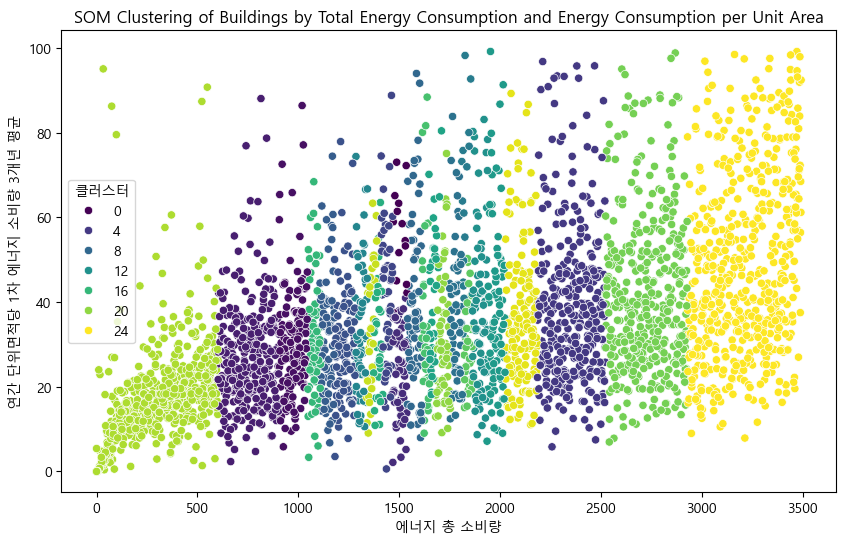

클러스터 0에 속하는 건물명:
['지행역' '정선병원' '수도권대 종합회의장' '행정동' '정읍시립요양병원' '충청소방학교' '경기도언어교육연수원 숙소동'
 '시립도서관(1동)' '072(법학도서관)' '평택시농업기술센터 본관' '상주시농업기술센터 가동' '자연과학2관' '28.생물관'
 '통영해양경찰서']
클러스터 1에 속하는 건물명:
['태백고생대자연사박물관' '한국폴리텍대학 원주캠퍼스(공과실습동) U동' '노천극장(학생동아리방)' '법학도서관'
 '008(두산인문관)' '의정부세무서' '화천군청' '서초문화예술회관' '임실군 종합경기장' '우암어린이회관(본관)' '시립박물관'
 '서구문화회관' '종합경기장' '국립민속국악원' '군산공항 여객청사' '세관검사장' '구로역사' '성동구보건소'
 '안산시립노인전문병원동' '강동도서관' '기숙사A동/해울관' '종로도서관' '익산도서관 및 학생회관' '대학원동'
 '기숙사B동/예지관' '137(언어교육원)' '경기성남교육도서관' '033(공학관4)' '법학관' '농업과학기술연구소'
 '구암평생학습원' '자연대2호관' '기숙사C동/함지관' '도서관/국제교육센터' '의과대학2호관' '학생회관' '중앙도서관 별관'
 '치과대학' '생활관A동' '진천군청소년수련원' '안양시립만안도서관' '상대3호관' '대학본부' '국제교류관' '인문학관'
 '공동실습관' 'IT관' '제4공학관(천안캠퍼스)' '공동실험실습관' '학생회관(S2)' '제1공학관' '양천도서관' '본관동'
 '청양대학(강의2동)' '공동실험실습관[삼척캠퍼스]' '제1.2공학관[삼척캠퍼스]' '창의인재관' '농생2호관'
 '옥천경찰서 본관동' '영주소방서' '부여군청(본관)' '경기도수원교육지원청' '당진시보건소(A동) ' '고성경찰서'
 '한국전력공사 강서양천지사' '잠실세무서청사' '구리시보건소' '분당소방서' '서울강동우체국' '한국전력공사 고양지사'
 '고양덕양우체국' '국립농산물품질관리원 경기지원' '군포의왕교육지원청' '문경시보건소' '동해우체국' '

In [49]:
# 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='에너지 총 소비량', y='연간 단위면적당 1차 에너지 소비량 3개년 평균', hue='클러스터', data=data, palette='viridis')
plt.title('SOM Clustering of Buildings by Total Energy Consumption and Energy Consumption per Unit Area')
plt.xlabel('에너지 총 소비량')
plt.ylabel('연간 단위면적당 1차 에너지 소비량 3개년 평균')
plt.show()

# 각 클러스터에 속하는 건물명 확인
for cluster in sorted(data['클러스터'].unique()):
    print(f"클러스터 {cluster}에 속하는 건물명:")
    print(data[data['클러스터'] == cluster]['건물명'].values)